- model select
전처리에 편하게 나눠서 처리할수 있게 도와주는것.
- feature

-preprocessing 전처리 -> learning -> model -> predict service

- 4차 산업시대
    - IOT (모든장비를 인터넷으로 묶은것)
    - Bigdata
    - AI
    - AR(증강현실)/VR(가상현실)/MR(증강+가상)
    - fintech
    - BlockChain
        
    - 가장현실적인 것
        - AIOT (AI + IOT)
        - 신경망
            -Tensorflow -> ANN -> FFNN(feed forword) -> MLP(Multi-layer-Perceptron)
            XOR문제를 해결을 못해서 -> Multi layer -> 기울기소멸 -> LSTM
    
    - preprocessing중에서 정규화를진행 해야함 ( 결측치 제거, 이상치 제거, 범주화 )
    - learning (500*30 데이터를 30*1로 가중치를 줘서 진행하면 500*1 로 500*30 을 대표)
        - (500*30개 중에 30개의 열에서 1개의 열로 줄여야함 단. 각 열이 주는 영향을 계산을 해서 해야함.)
    - 차원확대 SVM ( Support vector machine )
    - 활성화 함수 (Activation function = 분류나 예측으로 결정 )
        - identity 가중치에 나온값을 그대로 보내면 (회귀) (MLPRegression)
        - sigmoid ( 0 ~ 1 ) -> 분류 (MLPClassifier)
        - softmax 클래스가 여러개 인놈을 분류시킬때
        - cost function ^(y_hat-y)
    - 수학계산을 하는 solver를 결정 
    - learning-rate(hyper Parameter*가중치)을 가변하는것이 adam (값을 처음엔 많이 차차 줄여서.)
    - 순전파 (y_hat을 만드는 과정)
    - 역전파 (가중치를 조정하는 과정)
    * 이걸 다합친게 tensorflow~
        - 데이터를 어떻게 분류할 것인가를 놓고 이미 많은 기계학습 알고리즘이 등장했다. 
        - ‘의사결정나무’나 ‘베이지안망’, ‘서포트벡터머신(SVM)’, ‘인공신경망’ 등이 대표적이다.\
        
        
        

In [168]:
%matplotlib inline
#쥬피터 전용
# 랜덤 사이즈를 채운후 행렬제곱을 하면 -> 정방,대칭행렬
# 고유값분해 -> 고유치,고유벡터(정직교)
# MDS 행렬곱(직교하는 2,3차원) : 2차원이나 3차원 특징추출
# forward propagation 순전파 : 예측분류과정(가중치가 Random하게 초기화)
# backward propagation 역전파 : 가중치 학습과정 (cost function = 기울기, learning rate)
# MLP : Multi layer perceptron : FFNN(Feed forward neural network)
# solver : 미분, learning-rate 조절 -> 가중치를 조절
# estimator, transformer
import matplotlib.pyplot as plt # 시각화 할때
import mglearn # 학습도움
# neural_network 신경망~
from sklearn.neural_network import MLPClassifier # MLPRegressor
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X,y = make_moons(n_samples=100, noise=0.25, random_state=3) # 교육용 데이터

In [169]:
# FONT 깨질때 폰트깨질때
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

C:\Users\ICT01_06\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, '특성 1')

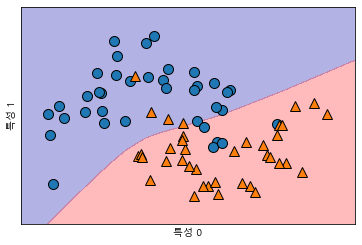

In [170]:
# stratify 층화 변수 선택법
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42) 
# stratify = y를 75:25 나누겠다.
# Multi layer => XOR 문제를 해결하고, 레이어가 많으면 정밀도가 자동으로 높아짐
mlp = MLPClassifier(random_state=0).fit(X_train, y_train)
# 가중치가 완성 ( fit ) -> layer 지정은 자동으로 MLPClassifier가 가중레이어 선정
mglearn.plots.plot_2d_separator(mlp,X_train,fill = True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [171]:
mlp.get_params() # 디폴트 매개변수(기본값)
# 'activation': 'relu' = 0이하를 제거한 활성화 함수(activation function)
# 속도가 빨라짐.
# 'learning_rate': 'constant' = 변하지 않는다
# 'max_iter': 200 반복 횟수 
#  epoch : 1회 반복
# 'solver': 'adam' = learing-rate를 조절, Momentum을 사용하는 optimizer(최적합)

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [172]:
mlp.n_layers_

3

In [173]:
mlp.coefs_ # coefficient
# bias : 계수들이 0으로 가는 것을 방지해서 처음엔 1로 셋팅

[array([[ 1.96423650e-01,  1.86414048e-01,  2.73074871e-02,
          1.32154297e-01, -9.48047217e-05,  2.82807555e-03,
         -7.29479240e-02,  1.45878653e-01,  2.97837159e-01,
         -1.12611776e-01,  2.34714552e-01,  1.30702586e-01,
         -2.85623212e-02,  1.12399918e-01, -1.71442282e-01,
         -3.24829063e-01, -3.85153290e-01,  2.38832765e-01,
          2.13193712e-01,  2.63746115e-01,  1.70653255e-01,
          7.41106685e-02,  1.04573476e-01,  6.73150355e-02,
         -3.77696555e-01,  1.10071889e-01,  4.88102808e-03,
          3.03409150e-01, -6.64267214e-02, -1.08723630e-01,
         -2.67443736e-01,  2.19702964e-01, -9.77933350e-02,
          3.95350833e-05, -1.67873856e-01,  1.32818304e-01,
          2.23922646e-02, -1.13671191e-02,  2.94106612e-01,
          3.48486041e-02, -1.28573692e-01, -1.62111791e-05,
          1.34093216e-01, -3.48957410e-01,  1.73951614e-01,
          2.50280090e-02, -3.77490782e-01, -3.22208104e-01,
         -8.09493846e-02, -4.14861544e-0

In [174]:
mlp.classes_

array([0, 1], dtype=int64)

In [175]:
mlp.n_outputs_

1

Text(0, 0.5, '특성 1')

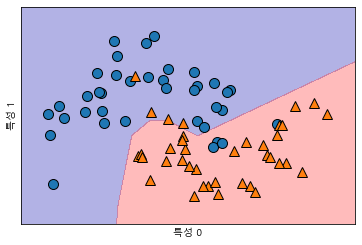

In [176]:
# 레이어가 2개, 10개이상주면 기울기 소실문제~
# 멀티레이어로 XOR문제를 해결, 정확도가 높아지는 것 발견
mlp = MLPClassifier(solver='lbfgs', # 과적합
                   random_state=0, hidden_layer_sizes=[10,5,10,2]).fit(X_train, y_train)
# SVM의 논리는 : 고차원으로 데이터를 확장 (유일한놈!!) Support vector marchine
    # - 정확도가 높고
    # - 과적합을 방지 - 그 중앙선을 찾아가기때문에!~
    # SVC(Classifier) , SVR (Regressor)
# 히든 레이어 사이즈 지정시 무엇을 지정하는가?
# 바로 출력차수만 지정해주면 됨 (추출할 특징수)
# 2*10 , 10*10
mglearn.plots.plot_2d_separator(mlp,X_train,fill = True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [177]:
# black box 여서 알수가없음~ 그래서 요새는 원인규명을 진행중
mlp.coefs_
# 2 * 10 bias 가 10
# 변수는 2*10, 10*10 
# 변수는 2*10, 10 * 10 / 10으로 나감


# 레이어 사이즈를 지정 출력차수만 지정(5,10) : 입력데이터
# 2*5 , 5*10 / 앞에 

[array([[ 0.67472461,  0.90013715,  0.8788155 ,  0.95115356, -0.10794928,
          0.52476967, -0.08824937,  1.22367387,  0.95974791,  1.26297683],
        [ 0.40759369, -0.46949073,  0.64208289,  1.35133418, -0.60653912,
         -0.38718416, -0.67839341,  0.00298986,  0.13655862,  0.97033277]]),
 array([[-0.33159377,  0.64277924, -0.0554561 , -0.18941282, -0.60856976],
        [ 0.11376675,  0.31304328,  0.14788489,  0.77869477,  0.22994575],
        [-0.18734719, -0.11960966,  0.24994158, -0.90331086,  0.21090768],
        [ 0.19064368, -0.27895477, -0.46929205, -1.04220709, -0.1723632 ],
        [ 0.08877694, -0.07764986,  0.61764   , -0.50328872, -0.36817975],
        [-0.44083987,  0.40904689, -0.31200888,  0.45397666, -0.32324461],
        [-0.4312967 , -0.49275346,  0.19770798, -0.45758528, -0.38372831],
        [-0.23190381,  0.84507079, -0.50954074,  0.41782206, -0.51080905],
        [ 0.55221899, -0.82196149,  0.6029535 , -0.61306376,  0.30259351],
        [-0.58261972, -0.

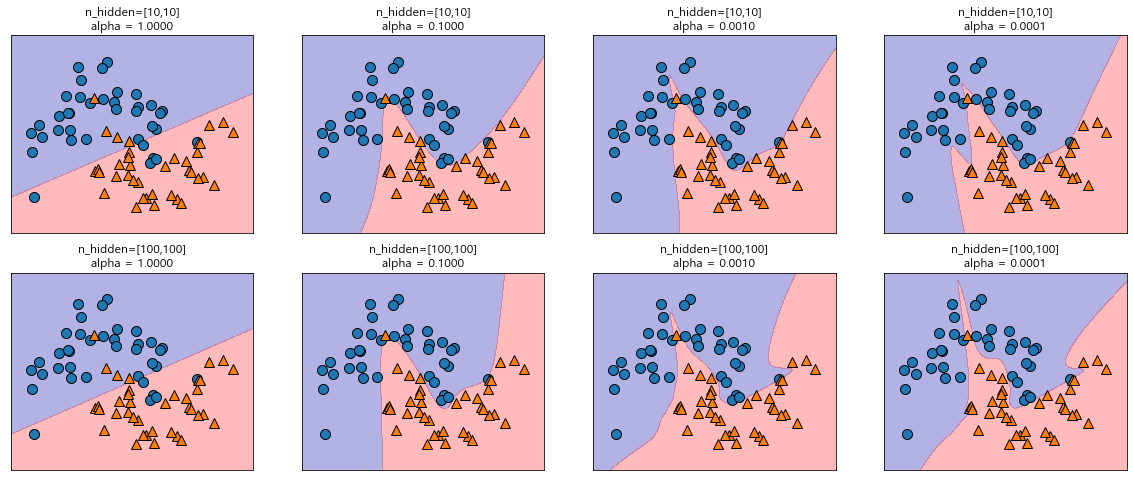

In [178]:
# 신경망은 비선형회귀/ 다차방정식에의한 비선형회귀
# 규제를 많이주면 산처럼 변하고 안주면 과적합됨..;;
import matplotlib.pyplot as plt # 시각화 할때
fig, axes = plt.subplots(2,4,figsize = (20,8))
for axx, n_hidden_nodes in zip(axes, [10,100]):
    for ax, alpha in zip(axx, [1,0.1,0.001,0.0001,0.00001]): # alpha 는 규제값임
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                           activation = 'tanh',
                           hidden_layer_sizes=[n_hidden_nodes,
                                              n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True,
                                       alpha=.3,ax=ax)
        mglearn.discrete_scatter(X_train[:,0], X_train[:,1],
                                y_train,ax=ax)
        ax.set_title("n_hidden=[{},{}]\nalpha = {:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

In [179]:
import matplotlib.pyplot as plt # 시각화 할때
# neural_network 신경망~
from sklearn.neural_network import MLPClassifier # MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("유방안 데이터의 특성별 최대값: \n{}".format(cancer.data.max(axis=0)))

유방안 데이터의 특성별 최대값: 
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [180]:
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train,y_train) # 가중치 결정
print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train,y_train))) # 94%
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test,y_test)))
mlp
# 20%정도 차이나면 과적합이고 10% 정도 차이나면 고민해야함;;

훈련 세트 정확도: 0.94
테스트 세트 정확도: 0.92


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [181]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)
# z점수 표준화~
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state = 0)
mlp.fit(X_train_scaled, y_train)

print("훈련세트정확도: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled,y_test)))

훈련세트정확도: 0.991
테스트 세트 정확도: 0.965


C:\Users\ICT01_06\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [182]:
mlp = MLPClassifier(max_iter=1000,random_state = 0) # max_iter=1000 천번돌려라
mlp.fit(X_train_scaled, y_train)

print("훈련세트정확도: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled,y_test)))

훈련세트정확도: 1.000
테스트 세트 정확도: 0.972


In [183]:
# 일반화 되었다~ 이런게 좋은 모델이다~
mlp = MLPClassifier(max_iter=1000,alpha = 1,random_state = 0) # alpha = 1  규제를줘라
mlp.fit(X_train_scaled, y_train)

print("훈련세트정확도: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled,y_test)))

훈련세트정확도: 0.988
테스트 세트 정확도: 0.972


In [184]:
mlp.coefs_

[array([[ 1.38710846e-02, -2.50121951e-02,  3.66222579e-02, ...,
         -3.47572622e-02, -2.24282383e-03, -1.97638723e-02],
        [ 1.26462143e-02, -6.82790623e-02,  3.70303247e-02, ...,
         -3.34389785e-02, -1.21200193e-02, -6.54680585e-02],
        [ 8.50428302e-03, -2.63297307e-02,  2.95094391e-02, ...,
         -1.72355685e-02,  1.05053722e-03, -1.30428184e-02],
        ...,
        [ 3.01969223e-03, -5.25847578e-02,  6.51799188e-02, ...,
         -4.07129917e-02, -3.25647552e-03, -3.30615217e-02],
        [-1.19219311e-03, -2.78480036e-02,  2.08436140e-02, ...,
         -2.74572097e-02,  5.09456645e-05, -2.03324679e-02],
        [-2.15747657e-02, -2.94202234e-02,  3.25639515e-02, ...,
         -2.14904553e-02, -4.01600447e-03, -2.92891532e-02]]),
 array([[-0.09540798],
        [ 0.23756701],
        [-0.19771946],
        [ 0.30384496],
        [ 0.16202467],
        [-0.00111623],
        [ 0.18081763],
        [ 0.08990004],
        [ 0.2707616 ],
        [-0.26194311],

C:\Users\ICT01_06\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_06\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


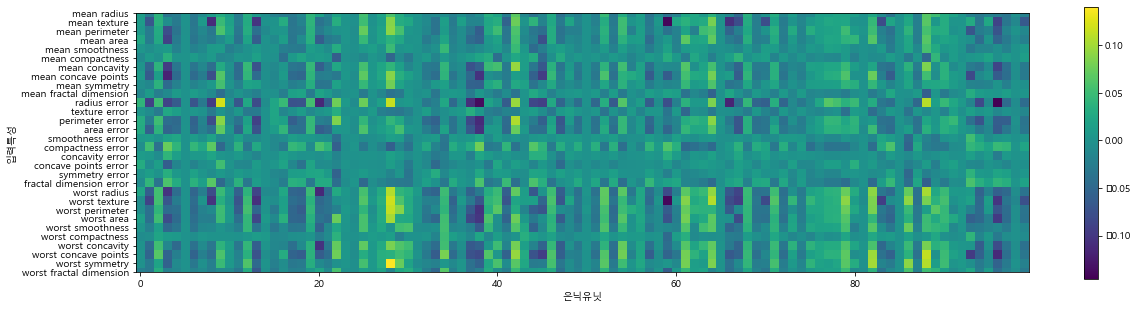

In [185]:
plt.figure(figsize =(20,5))
plt.imshow(mlp.coefs_[0], interpolation = 'none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("은닉유닛")
plt.ylabel("입력특성")
plt.colorbar()

In [186]:
import pandas as pd

wine = pd.read_csv('./wine_data.csv', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash",
                                             "Alcalinity_of_Ash", "Magnesium", "Total_phenols",
                                             "Falvanoids", "Nonflavanoid_phenols",
                                             "Proanthocyanins", "Color_intensity", "Hue",
                                             "OD280", "Proline"], encoding="utf-8") 

# wine.data = 
#wine = -wine.iloc[:,:1]

In [187]:
wine.target = wine.iloc[:,:1]
wine.data = wine.iloc[:,1:14]

C:\Users\ICT01_06\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
C:\Users\ICT01_06\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [188]:
#print(wine.target)
#print(wine.data)

In [189]:
# Z 점수 정규화 한거~
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=0)

# z점수 표준화~
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(max_iter=60,alpha = 2,random_state=42)
mlp.fit(X_train_scaled, y_train)
print("훈련세트정확도: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled,y_test)))

훈련세트정확도: 0.992
테스트 세트 정확도: 0.978


C:\Users\ICT01_06\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ICT01_06\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [190]:
# 정규화 없이~
mlp2 = MLPClassifier(max_iter=60,alpha = 2,random_state=0)
mlp2.fit(X_train, y_train)
print("훈련세트정확도: {:.3f}".format(mlp.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test,y_test)))

훈련세트정확도: 0.323
테스트 세트 정확도: 0.356


C:\Users\ICT01_06\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ICT01_06\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [191]:
# min max 한거~
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC # Classifiction 분류

svm =SVC()
mms = MinMaxScaler()
mms.fit(X_train,y_train)
#mms.fit(X_test,y_test)
#X_train_scaled = scaler.transform(X_train)
#svm.fit(X_train_scaled, y_train)
#X_test_scaled = scaler.transform(X_test)
print("훈련세트정확도: {:.3f}".format(svm.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(svm.score(X_test,y_test)))


NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [192]:
# 선생님이 한거
# 데이터셋 나누기~
from sklearn.model_selection import train_test_split

wine.shape

X = wine.drop('Cultivator', axis=1)
y = wine['Cultivator']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [193]:
print(y.unique())

[1 2 3]


In [194]:
# 전처리
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) # X_train에만 fit
# StandardScaler(copy =True, with_mean=True, with_std=True)
# 원본은 그대로
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [195]:
# 모델만들기
from sklearn.neural_network import MLPClassifier
# 디폴트 hidden_layer_sizes(100,)
mlp = MLPClassifier(hidden_layer_sizes=(30,30,20))
mlp.fit(X_train,y_train)

C:\Users\ICT01_06\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [196]:
# 모델평가
from sklearn.metrics import classification_report
# precision = 정밀도 = TP/(TP+FP) : 예측을 중심으로 생각
# recall = 재현율 TP/(TP+TN) : 실제값을 중심으로 생각
# F1 Score = 2*(정밀도*재현율)/(정밀도+재현율)
from sklearn.metrics import confusion_matrix
predictions = mlp.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
# 1,2,3의 의미 unique
#  macro avg 평균
# weighted avg 가중평균

[[16  0  0]
 [ 0 21  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00         8

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



(13, 30)
(30, 30)
(30, 20)


C:\Users\ICT01_06\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_06\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


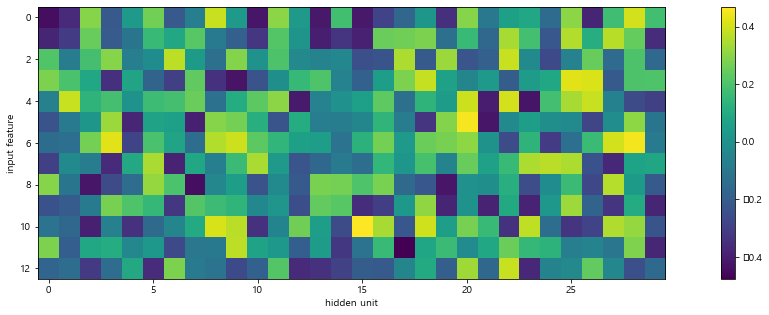

In [197]:
print(mlp.coefs_[0].shape) #  13 * 30 
print(mlp.coefs_[1].shape) #  30 * 30
print(mlp.coefs_[2].shape) #  30 * 30 
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.xlabel("hidden unit")
plt.ylabel("input feature")
plt.colorbar()


# NME(Non - negative matrix factorization) : 비음수 행렬 분해
- PCA는 음수와 양수의 차이를 상계해서 처리
- 양수인 데이터에 적용 : 음성데이터, signal


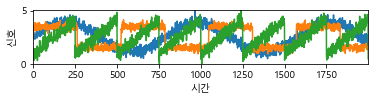

In [198]:
S = mglearn.datasets.make_signals()
plt.figure(figsize = (6,1))
plt.plot(S, '-')
plt.xlabel("시간")
plt.ylabel("신호")
plt.margins(0)

In [199]:
import numpy as np
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S, A.T)
print("측정 데이터 형태 : {}".format(X.shape))

측정 데이터 형태 : (2000, 100)


In [200]:
from sklearn.decomposition import NMF
nmf =NMF(n_components = 3, random_state =42)
S_ = nmf.fit_transform(X)
print("복원한 신호 데이터 형태: {}".format(S_.shape))

복원한 신호 데이터 형태: (2000, 3)


In [201]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
H = pca.fit_transform(X)

In [202]:
# FONT 깨질때 폰트깨질때
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

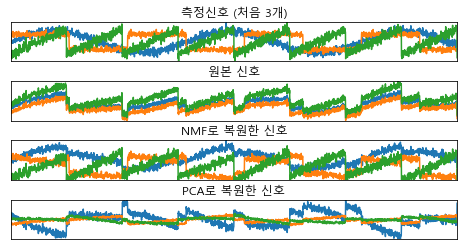

In [203]:
# 원본,노이즈,NMF,PCA
models = [S,X,S_,H] # 노이즈 : 양수 데이터는 노이즈를 제거못함
names = ['측정신호 (처음 3개)',
        '원본 신호',
        'NMF로 복원한 신호',
        'PCA로 복원한 신호']
fig,axes = plt.subplots(4,figsize=(8,4), gridspec_kw={'hspace':.5}, subplot_kw={'xticks' : (), 'yticks' : ()})
for model, name, ax in zip(models,names,axes):
    ax.set_title(name)
    ax.plot(model[:,:3],'-')
    ax.margins(0)

In [204]:
# 군집 분석 시각화